### 로지스틱

### 1. IRIS data set

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [30]:
sy = pd.Series(iris.target)

df['sp'] = sy
df = df.rename(index = str, columns = {'sepal length (cm)' : 'sl', 'sepal width (cm)' : 'sw', 
                                       'petal length (cm)' : 'pl', 'petal width (cm)' : 'pw'})
df.tail()

,sl,sw,pl,pw,sp
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [31]:
df1 = df[0:100]
df1 = df1.drop(['sw', 'pl', 'pw'], axis = 1)
df1 = pd.DataFrame(df1)
df1.tail()

,sl,sp
95,5.7,1
96,5.7,1
97,6.2,1
98,5.1,1
99,5.7,1


### 2. 모델 생성

In [32]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

model = sm.Logit.from_formula("sp ~ sl", df1)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                     sp   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Mar 2018   Pseudo R-squ.:                  0.5368
Time:                        13:58:12   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 6.320e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sl             5.1403      1.007      5.107      0.000       3.168       7.113


### 3. Predict

In [37]:
y = df1['sp']
y = pd.DataFrame(y)
y.tail()

,sp
95,1
96,1
97,1
98,1
99,1


In [39]:
y_pred = result.predict()
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.round()
y_pred.tail()

,0
95,1.0
96,1.0
97,1.0
98,0.0
99,1.0


In [40]:
from sklearn.metrics import *
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.90      0.89        50
          1       0.90      0.88      0.89        50

avg / total       0.89      0.89      0.89       100



In [41]:
fpr0, tpr0, thresholds0 = roc_curve(y, y_pred)

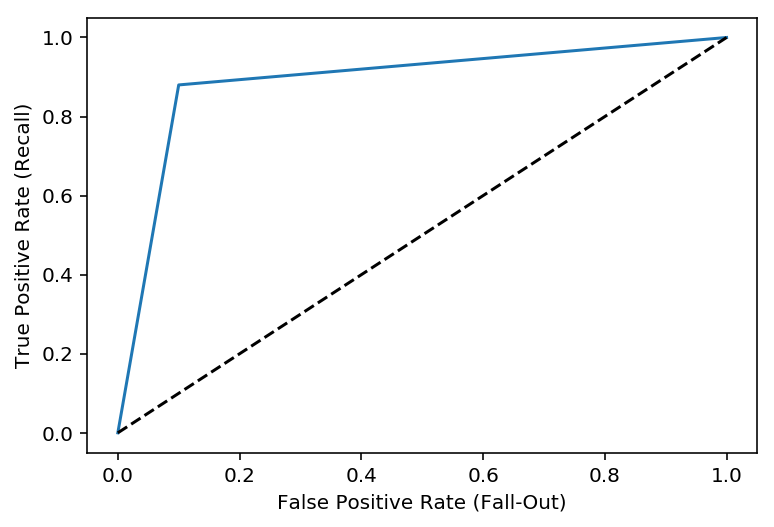

In [42]:
import matplotlib.pylab as plt
plt.plot(fpr0, tpr0, label="predict")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

In [43]:
from sklearn.metrics import auc
auc(fpr0, tpr0)

0.89